In [1]:
import sys
sys.path.append(
    "/home/xieyangfan/projects/rascil_main_master/rascil2_test/rascil2"
)

In [2]:
import astropy.units as u
import numpy
from astropy.coordinates import SkyCoord
from astropy.time import Time
from rascil2.processing_components.visibility import (
    create_visibility,
    create_visibility_ephem
)
from rascil2.data_models.memory_data_models import SkyComponent
from rascil2.data_models.polarisation import PolarisationFrame
from rascil2.processing_components.imaging import dft_skycomponent_visibility
from rascil2.processing_components.simulation import create_named_configuration
from rascil2.processing_components.visibility.base import (
    copy_visibility,
    create_visibility,
    create_visibility_from_source,
    phaserotate_visibility,
    generate_baselines,
)
from rascil2.processing_components.visibility.operations import (
    qa_visibility,
    subtract_visibility,
    divide_visibility,
    concatenate_visibility,
)

In [40]:
midconfig = create_named_configuration("MID")
times = (numpy.pi / 43200.0) * numpy.arange(-300, 300.0, 30.0)
frequency = numpy.linspace(1.3e9, 1.4e9, 3)
channel_bandwidth = numpy.full(3,frequency[1]-frequency[0])
phasecentre = SkyCoord(
            ra=+18.0 * u.deg, dec=-35.0 * u.deg, frame="icrs", equinox="J2000"
        )
utc_times = Time("2023-06-06T00:00:00.000", format="isot", scale="utc")

In [41]:
midconfig.location.geodetic

GeodeticLocation(lon=<Longitude 21.443803 deg>, lat=<Latitude -30.712925 deg>, height=<Quantity 1053. m>)

In [42]:
midconfig.location.geodetic[2].to(u.m).value

1052.9999999988365

In [43]:
vis = create_visibility(
            midconfig,
            times,
            frequency,
            channel_bandwidth=channel_bandwidth,
            phasecentre=phasecentre,
            weight=1.0,
            utc_time=utc_times,
        )

In [44]:
vis

<xarray.Visibility>
Dimensions:            (time: 20, baselines: 19503, frequency: 3,
                        polarisation: 4, spatial: 3)
Coordinates:
  * time               (time) float64 5.193e+09 5.193e+09 ... 5.193e+09
  * baselines          (baselines) object MultiIndex
  * antenna1           (baselines) int64 0 0 0 0 0 0 ... 194 194 194 195 195 196
  * antenna2           (baselines) int64 0 1 2 3 4 5 ... 194 195 196 195 196 196
  * frequency          (frequency) float64 1.3e+09 1.35e+09 1.4e+09
  * polarisation       (polarisation) <U2 'XX' 'XY' 'YX' 'YY'
  * spatial            (spatial) <U1 'u' 'v' 'w'
Data variables:
    integration_time   (time) float64 30.0 30.0 30.0 30.0 ... 30.0 30.0 30.0
    datetime           (time) datetime64[ns] 2023-06-06T06:44:22.332071015 .....
    vis                (time, baselines, frequency, polarisation) complex128 ...
    weight             (time, baselines, frequency, polarisation) float64 0.0...
    imaging_weight     (time, baselines, frequency, polarisation) float64 0.0...
    flags              (time, baselines, frequency, polarisation) int64 1 ... 1
    uvw                (time, baselines, spatial) float64 0.0 0.0 ... 0.0 0.0
    uvw_lambda         (time, baselines, frequency, spatial) float64 0.0 ... 0.0
    uvdist_lambda      (time, baselines, frequency) float64 0.0 0.0 ... 0.0 0.0
    channel_bandwidth  (frequency) float64 5e+07 5e+07 5e+07
Attributes:
    rascil_data_model:    Visibility
    configuration:        <xarray.Configuration>\nDimensions:   (id: 197, spa...
    source:               unknown
    phasecentre:          <SkyCoord (ICRS): (ra, dec) in deg\n    (18., -35.)>
    _polarisation_frame:  linear
    meta:                 None

In [45]:
times

array([-0.02181662, -0.01963495, -0.01745329, -0.01527163, -0.01308997,
       -0.01090831, -0.00872665, -0.00654498, -0.00436332, -0.00218166,
        0.        ,  0.00218166,  0.00436332,  0.00654498,  0.00872665,
        0.01090831,  0.01308997,  0.01527163,  0.01745329,  0.01963495])

In [46]:
vis2 = create_visibility_ephem(
            midconfig,
            times,
            frequency,
            channel_bandwidth=channel_bandwidth,
            phasecentre=phasecentre,
            weight=1.0,
            utc_time=utc_times,
            use_ephem=True,
        )

In [47]:
utc_times.to_datetime()

datetime.datetime(2023, 6, 6, 0, 0)

In [48]:
vis2

<xarray.Visibility>
Dimensions:            (time: 20, baselines: 19503, frequency: 3,
                        polarisation: 4, spatial: 3)
Coordinates:
  * time               (time) float64 5.193e+09 5.193e+09 ... 5.193e+09
  * baselines          (baselines) object MultiIndex
  * antenna1           (baselines) int64 0 0 0 0 0 0 ... 194 194 194 195 195 196
  * antenna2           (baselines) int64 0 1 2 3 4 5 ... 194 195 196 195 196 196
  * frequency          (frequency) float64 1.3e+09 1.35e+09 1.4e+09
  * polarisation       (polarisation) <U2 'XX' 'XY' 'YX' 'YY'
  * spatial            (spatial) <U1 'u' 'v' 'w'
Data variables:
    integration_time   (time) float64 30.0 30.0 30.0 30.0 ... 30.0 30.0 30.0
    datetime           (time) datetime64[ns] 2023-06-06T06:44:34.642268149 .....
    vis                (time, baselines, frequency, polarisation) complex128 ...
    weight             (time, baselines, frequency, polarisation) float64 0.0...
    imaging_weight     (time, baselines, frequency, polarisation) float64 0.0...
    flags              (time, baselines, frequency, polarisation) int64 1 ... 1
    uvw                (time, baselines, spatial) float64 0.0 0.0 ... 0.0 0.0
    uvw_lambda         (time, baselines, frequency, spatial) float64 0.0 ... 0.0
    uvdist_lambda      (time, baselines, frequency) float64 0.0 0.0 ... 0.0 0.0
    channel_bandwidth  (frequency) float64 5e+07 5e+07 5e+07
Attributes:
    rascil_data_model:    Visibility
    configuration:        <xarray.Configuration>\nDimensions:   (id: 197, spa...
    source:               unknown
    phasecentre:          <SkyCoord (ICRS): (ra, dec) in deg\n    (18., -35.)>
    _polarisation_frame:  linear
    meta:                 None

In [49]:
uvw = vis.uvw.data

In [50]:
uvw2 = vis2.uvw.data

In [51]:
uvw.shape

(20, 19503, 3)

In [52]:
import matplotlib.pyplot as plt

In [53]:
res = uvw-uvw2

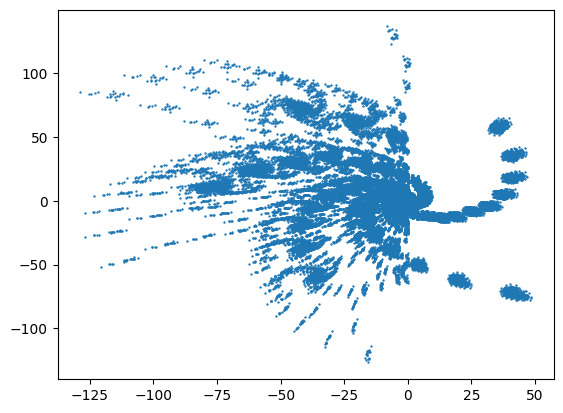

In [57]:
plt.scatter(res[:,:,0],res[:,:,1],s=0.5)

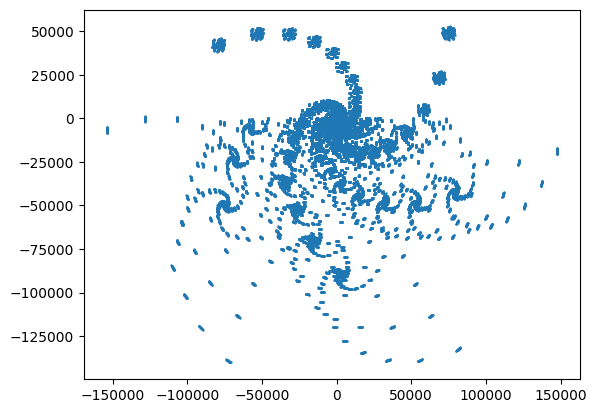

In [58]:
plt.scatter(uvw[:,:,0],uvw[:,:,1],s=0.5)

In [59]:
plt.scatter(uvw2[:,:,0],uvw2[:,:,1],s=0.5)

In [75]:
plt.scatter(uvw[:,:,0],uvw[:,:,1],s=0.5)
plt.scatter(uvw2[:,:,0],uvw2[:,:,1],s=0.5)
plt.xlim(15340,15360)
plt.ylim(-900,-500)

(-900.0, -500.0)

In [63]:
# plt.scatter(res[:,:,0],res[:,:,1],s=0.5)
# plt.xlim(-100,100)
# plt.ylim(-100,100)